### An engineering problem from "Engineering Optimization" by Xin-She Yang

Goal: Design an optimal spring (cheapest / least material needed) that does the job. Parameters we can change: $d$, the diameter of the coil; $L$, the length of the spring; $w$, the thickness of the wire.

Task: Minimize $$(2+L)dw^2$$ subject to the constraints
\begin{align*}
g_1(L,d,w) &= 1 - \frac{d^3L}{7178w^4} \leq 0\\[5pt]
g_2(L,d,w) &= \frac{4d^2 - wd}{12566dw^3 - w^4} + \frac{1}{5108w^2} - 1 \leq 0\\[5pt]
g_3(L,d,w) &= 1 - \frac{140.45w}{d^2L} \leq 0\\[5pt]
g_4(L,d,w) &= \frac{w+d}{1.5} - 1 \leq 0
\end{align*}
with boundary conditions
$$
0.05 \leq w \leq 2.0
\qquad\qquad
0.25 \leq d \leq 1.3
\qquad\qquad
2.0 \leq L \leq 15.0
$$

In [64]:
import math
import random

In [65]:
def random_in_range(lower, upper):
    return random.random() * (upper - lower) + lower
random_in_range(2, 15)

9.807272192879124

In [66]:
def g1(L,d,w):
    return 1 - d**3 * L / (7178 * w**4)

def g2(L,d,w):
    return (4*d**2 - w*d)/(12566 * d * w**3 - w**4) + 1/(5108*w**2) - 1

def g3(L,d,w):
    return 1 - 140.45 * w / (d**2*L)

def g4(L,d,w):
    return (w+d)/1.5 - 1

def satisfies_constraints(L,d,w):
    return g1(L,d,w) <= 0 and g2(L,d,w) <= 0 and g3(L,d,w) <= 0 and g4(L,d,w) <= 0

In [67]:
def score(L,d,w):  # w-squared is "w**2" not "w^2"
    return (2+L)*d*w**2

In [68]:
def tweak(L,d,w):
    delta_w = 0.01
    delta_d = 0.01
    delta_L = 0.1
    
    new_w = w + random_in_range(-1, 1) * delta_w
    while new_w < 0.05 or new_w > 2:
        new_w = w + random_in_range(-1, 1) * delta_w
    
    new_d = d + random_in_range(-1, 1) * delta_d
    while new_d < 0.25 or new_d > 1.3:
        new_d = d + random_in_range(-1, 1) * delta_d
        
    new_L = L + random_in_range(-1, 1) * delta_L
    while new_L < 2 or new_L > 15:
        new_L = L + random_in_range(-1, 1) * delta_L
        
    return (new_L, new_d, new_w)
        
tweak(15, 1.3, 2.0)

(14.985475559511695, 1.2953884226171417, 1.9955223584629296)

In [69]:
def random_solution():
    return (
        random_in_range(2, 15),
        random_in_range(0.25, 1.3),
        random_in_range(0.05, 2),
    )
print(random_solution())

(14.670093262180803, 1.0832237814826102, 1.7099436217865769)


In [70]:
# what does the * do
def test(num1, num2):
    return num1 + num2
L = [1,3]
test(*L)

4

In [88]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from math import sqrt, pi

def show_spring(L,d,w):
    
    ax.lines.clear()
    
    N = L

    theta = np.linspace(0, N * 2 * np.pi, 1000)
    z = theta/2/np.pi
    x = d * np.sin(theta)
    y = d* np.cos(theta)
    line = ax.plot(x, y, z, color='b', label='parametric curve', lw=w*30) # the full spiral

    fig.canvas.draw()




In [106]:
def hill_climbing():
    
    start = random_solution()
    while not satisfies_constraints(*start):
        start = random_solution()
    sol = start
    value = score(*sol)

    bad = 0
    while True:
        new_sol = tweak(*sol)
        while not satisfies_constraints(*new_sol):
            new_sol = tweak(*sol)
        new_value = score(*new_sol)
        if new_value < value:
            bad = 0
            sol = new_sol
            value = new_value
            show_spring(*sol)
            
        else:
            bad += 1
            if bad > 1000:
                print(value)
                return sol
    


<IPython.core.display.Javascript object>


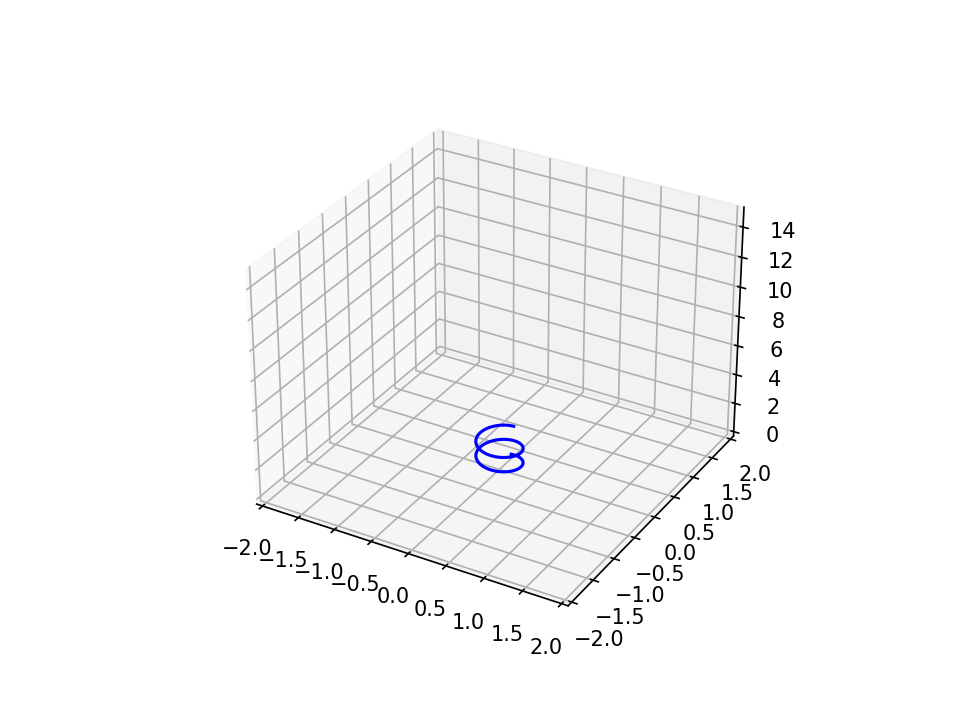

(0.0, 15.0)

In [107]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([0,15])

In [108]:
sol = hill_climbing()
#sol = [2.02310938, 0.25113418, 0.05218225]
# L, d, w
print(sol)
print(g1(*sol), g2(*sol), g3(*sol), g4(*sol))
print(score(*sol))

0.002826002117435616
(2.0194986124346066, 0.2812040553381623, 0.050002245742574475)
-0.0007988621780734562 -0.2375130005865349 -42.97689226250465 -0.7791957992795088
0.002826002117435616


In [109]:
old_sol = [2.02310938, 0.25113418, 0.05218225]
score(*old_sol)

0.0027511436522230925

<IPython.core.display.Javascript object>


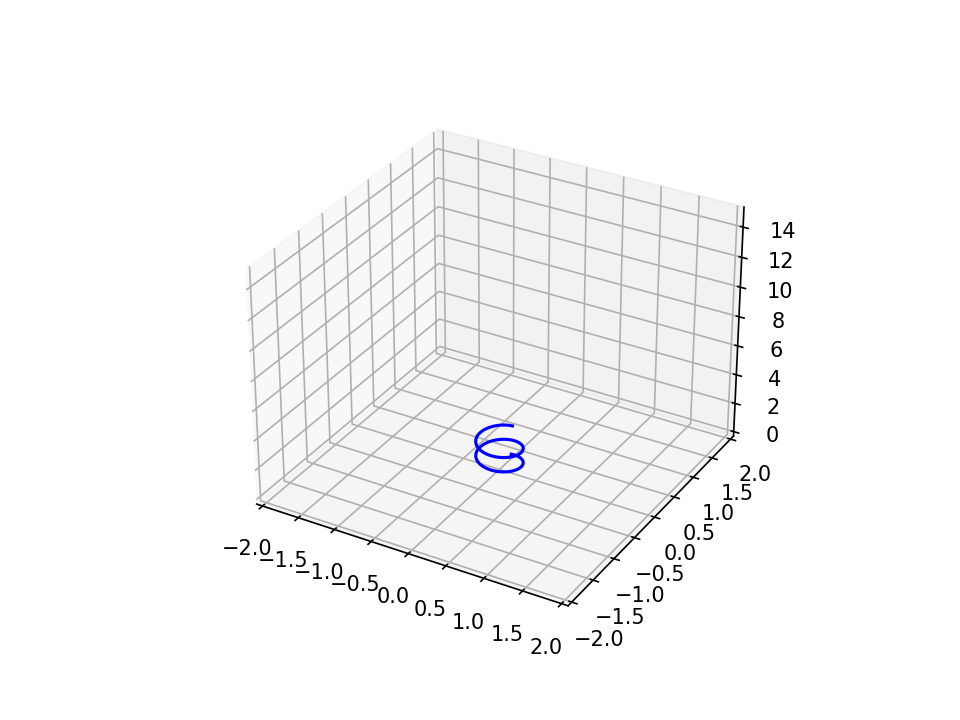

(0.0, 15.0)

In [110]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([0,15])

In [111]:
# smarter: sample 1000 tweaks to find a good initial_temp that gives a desired p_0
# or: heat the system slowly until the % of worsening solutions is what you want
initial_temp = 0.005
alpha = 0.99
final_temp = initial_temp / 1000
trials_per_temp = 10000

start = random_solution()
while not satisfies_constraints(*start):
    start = random_solution()
sol = start
value = score(*sol)

In [112]:
temp = initial_temp
generation = 0
best_sol = None
best_score = None

while temp >= final_temp:
    generation += 1
    accepted_worse = 0
    total_worse = 0
    for i in range(trials_per_temp):
        new_sol = tweak(*sol)
        while not satisfies_constraints(*new_sol):
            new_sol = tweak(*sol)

        new_value = score(*new_sol)
        
        delta = new_value - value
        delta *= -1
        if delta >= 0:
            sol = new_sol
            value = new_value
            if best_score is None or value < best_score:
                best_sol = sol
                best_score = value
        else:
            total_worse += 1
            p = math.exp(delta/temp)
            r = random.random()
            if r <= p:
                accepted_worse += 1
                sol = new_sol
                value = new_value
    
    print(
        f"Gen #{generation}: temp = {temp:.6f}, "
        f"best score = {best_score:.8f}, "
        f"cur score = {value:.8f}, "
        f"worse accepted = {round(accepted_worse/total_worse*100,2):.2f}%"
    )
    show_spring(*sol)
    temp = temp * alpha
    


Gen #1: temp = 0.005000, best score = 0.00498211, cur score = 0.02607645, worse accepted = 58.18%
Gen #2: temp = 0.004950, best score = 0.00498211, cur score = 0.01496877, worse accepted = 64.49%
Gen #3: temp = 0.004901, best score = 0.00434472, cur score = 0.01138213, worse accepted = 71.81%
Gen #4: temp = 0.004851, best score = 0.00388479, cur score = 0.01106695, worse accepted = 71.14%
Gen #5: temp = 0.004803, best score = 0.00388479, cur score = 0.01856064, worse accepted = 67.02%
Gen #6: temp = 0.004755, best score = 0.00388479, cur score = 0.00749262, worse accepted = 59.51%
Gen #7: temp = 0.004707, best score = 0.00323558, cur score = 0.02423678, worse accepted = 74.97%
Gen #8: temp = 0.004660, best score = 0.00323558, cur score = 0.00634979, worse accepted = 61.76%
Gen #9: temp = 0.004614, best score = 0.00323558, cur score = 0.00616578, worse accepted = 71.63%
Gen #10: temp = 0.004568, best score = 0.00323558, cur score = 0.00973546, worse accepted = 69.72%
Gen #11: temp = 0.0

Gen #85: temp = 0.002149, best score = 0.00293984, cur score = 0.00701622, worse accepted = 65.94%
Gen #86: temp = 0.002128, best score = 0.00293984, cur score = 0.00846765, worse accepted = 58.20%
Gen #87: temp = 0.002107, best score = 0.00293984, cur score = 0.01113894, worse accepted = 53.09%
Gen #88: temp = 0.002086, best score = 0.00293984, cur score = 0.00797868, worse accepted = 46.85%
Gen #89: temp = 0.002065, best score = 0.00293984, cur score = 0.00949566, worse accepted = 49.42%
Gen #90: temp = 0.002044, best score = 0.00293984, cur score = 0.00594854, worse accepted = 58.51%
Gen #91: temp = 0.002024, best score = 0.00293984, cur score = 0.00938367, worse accepted = 53.77%
Gen #92: temp = 0.002003, best score = 0.00293984, cur score = 0.00754997, worse accepted = 49.80%
Gen #93: temp = 0.001983, best score = 0.00293984, cur score = 0.00534766, worse accepted = 64.29%
Gen #94: temp = 0.001964, best score = 0.00293984, cur score = 0.00585790, worse accepted = 61.24%
Gen #95: t

Gen #169: temp = 0.000924, best score = 0.00285677, cur score = 0.00566171, worse accepted = 49.48%
Gen #170: temp = 0.000915, best score = 0.00285677, cur score = 0.00491238, worse accepted = 43.80%
Gen #171: temp = 0.000906, best score = 0.00285677, cur score = 0.00445710, worse accepted = 44.08%
Gen #172: temp = 0.000897, best score = 0.00285677, cur score = 0.00564290, worse accepted = 47.51%
Gen #173: temp = 0.000888, best score = 0.00285677, cur score = 0.00762985, worse accepted = 48.89%
Gen #174: temp = 0.000879, best score = 0.00285677, cur score = 0.00464120, worse accepted = 45.82%
Gen #175: temp = 0.000870, best score = 0.00285677, cur score = 0.00494756, worse accepted = 49.59%
Gen #176: temp = 0.000861, best score = 0.00285677, cur score = 0.00370834, worse accepted = 47.52%
Gen #177: temp = 0.000853, best score = 0.00285677, cur score = 0.00573158, worse accepted = 45.04%
Gen #178: temp = 0.000844, best score = 0.00285677, cur score = 0.00534699, worse accepted = 37.51%


Gen #252: temp = 0.000401, best score = 0.00283286, cur score = 0.00398456, worse accepted = 37.74%
Gen #253: temp = 0.000397, best score = 0.00283286, cur score = 0.00317987, worse accepted = 42.28%
Gen #254: temp = 0.000393, best score = 0.00283286, cur score = 0.00344424, worse accepted = 41.00%
Gen #255: temp = 0.000389, best score = 0.00283286, cur score = 0.00347014, worse accepted = 38.31%
Gen #256: temp = 0.000385, best score = 0.00283286, cur score = 0.00390225, worse accepted = 36.06%
Gen #257: temp = 0.000382, best score = 0.00283286, cur score = 0.00403573, worse accepted = 38.86%
Gen #258: temp = 0.000378, best score = 0.00283286, cur score = 0.00371763, worse accepted = 39.63%
Gen #259: temp = 0.000374, best score = 0.00283286, cur score = 0.00397368, worse accepted = 38.27%
Gen #260: temp = 0.000370, best score = 0.00283286, cur score = 0.00370070, worse accepted = 37.99%
Gen #261: temp = 0.000367, best score = 0.00283286, cur score = 0.00305254, worse accepted = 32.54%


Gen #334: temp = 0.000176, best score = 0.00282915, cur score = 0.00326508, worse accepted = 31.51%
Gen #335: temp = 0.000174, best score = 0.00282915, cur score = 0.00360273, worse accepted = 28.95%
Gen #336: temp = 0.000172, best score = 0.00282915, cur score = 0.00353117, worse accepted = 33.46%
Gen #337: temp = 0.000171, best score = 0.00282915, cur score = 0.00304915, worse accepted = 31.52%
Gen #338: temp = 0.000169, best score = 0.00282915, cur score = 0.00336499, worse accepted = 31.61%
Gen #339: temp = 0.000167, best score = 0.00282915, cur score = 0.00347768, worse accepted = 30.24%
Gen #340: temp = 0.000166, best score = 0.00282915, cur score = 0.00352157, worse accepted = 31.86%
Gen #341: temp = 0.000164, best score = 0.00282915, cur score = 0.00323765, worse accepted = 30.65%
Gen #342: temp = 0.000162, best score = 0.00282915, cur score = 0.00329003, worse accepted = 31.26%
Gen #343: temp = 0.000161, best score = 0.00282915, cur score = 0.00362503, worse accepted = 31.05%


Gen #416: temp = 0.000077, best score = 0.00282498, cur score = 0.00298631, worse accepted = 21.88%
Gen #417: temp = 0.000076, best score = 0.00282498, cur score = 0.00301183, worse accepted = 23.23%
Gen #418: temp = 0.000076, best score = 0.00282498, cur score = 0.00308927, worse accepted = 23.34%
Gen #419: temp = 0.000075, best score = 0.00282498, cur score = 0.00302248, worse accepted = 22.73%
Gen #420: temp = 0.000074, best score = 0.00282498, cur score = 0.00287342, worse accepted = 22.74%
Gen #421: temp = 0.000073, best score = 0.00282498, cur score = 0.00289623, worse accepted = 22.65%
Gen #422: temp = 0.000073, best score = 0.00282498, cur score = 0.00313268, worse accepted = 21.65%
Gen #423: temp = 0.000072, best score = 0.00282498, cur score = 0.00304524, worse accepted = 21.00%
Gen #424: temp = 0.000071, best score = 0.00282498, cur score = 0.00302269, worse accepted = 21.42%
Gen #425: temp = 0.000071, best score = 0.00282498, cur score = 0.00303798, worse accepted = 20.22%


Gen #498: temp = 0.000034, best score = 0.00282302, cur score = 0.00285795, worse accepted = 9.14%
Gen #499: temp = 0.000034, best score = 0.00282302, cur score = 0.00291653, worse accepted = 9.67%
Gen #500: temp = 0.000033, best score = 0.00282302, cur score = 0.00286959, worse accepted = 10.05%
Gen #501: temp = 0.000033, best score = 0.00282302, cur score = 0.00286231, worse accepted = 9.17%
Gen #502: temp = 0.000033, best score = 0.00282302, cur score = 0.00296747, worse accepted = 9.11%
Gen #503: temp = 0.000032, best score = 0.00282302, cur score = 0.00290710, worse accepted = 9.33%
Gen #504: temp = 0.000032, best score = 0.00282302, cur score = 0.00286387, worse accepted = 9.32%
Gen #505: temp = 0.000032, best score = 0.00282302, cur score = 0.00286346, worse accepted = 9.28%
Gen #506: temp = 0.000031, best score = 0.00282302, cur score = 0.00290621, worse accepted = 9.21%
Gen #507: temp = 0.000031, best score = 0.00282302, cur score = 0.00297317, worse accepted = 8.72%
Gen #508:

Gen #581: temp = 0.000015, best score = 0.00282233, cur score = 0.00287821, worse accepted = 2.21%
Gen #582: temp = 0.000015, best score = 0.00282192, cur score = 0.00282888, worse accepted = 2.33%
Gen #583: temp = 0.000014, best score = 0.00282192, cur score = 0.00286232, worse accepted = 2.13%
Gen #584: temp = 0.000014, best score = 0.00282192, cur score = 0.00292006, worse accepted = 2.65%
Gen #585: temp = 0.000014, best score = 0.00282192, cur score = 0.00286502, worse accepted = 2.24%
Gen #586: temp = 0.000014, best score = 0.00282192, cur score = 0.00284576, worse accepted = 2.16%
Gen #587: temp = 0.000014, best score = 0.00282192, cur score = 0.00289848, worse accepted = 2.29%
Gen #588: temp = 0.000014, best score = 0.00282192, cur score = 0.00285102, worse accepted = 2.27%
Gen #589: temp = 0.000014, best score = 0.00282192, cur score = 0.00288068, worse accepted = 2.03%
Gen #590: temp = 0.000013, best score = 0.00282192, cur score = 0.00286061, worse accepted = 2.10%
Gen #591: 

Gen #664: temp = 0.000006, best score = 0.00282177, cur score = 0.00285278, worse accepted = 0.56%
Gen #665: temp = 0.000006, best score = 0.00282177, cur score = 0.00286040, worse accepted = 0.26%
Gen #666: temp = 0.000006, best score = 0.00282177, cur score = 0.00284972, worse accepted = 0.51%
Gen #667: temp = 0.000006, best score = 0.00282177, cur score = 0.00282732, worse accepted = 0.22%
Gen #668: temp = 0.000006, best score = 0.00282177, cur score = 0.00284093, worse accepted = 0.30%
Gen #669: temp = 0.000006, best score = 0.00282177, cur score = 0.00284471, worse accepted = 0.37%
Gen #670: temp = 0.000006, best score = 0.00282177, cur score = 0.00283511, worse accepted = 0.33%
Gen #671: temp = 0.000006, best score = 0.00282177, cur score = 0.00284310, worse accepted = 0.40%
Gen #672: temp = 0.000006, best score = 0.00282177, cur score = 0.00284440, worse accepted = 0.39%
Gen #673: temp = 0.000006, best score = 0.00282177, cur score = 0.00284997, worse accepted = 0.35%
Gen #674: 

In [97]:
best_sol

(2.0025702338411326, 0.281986151674571, 0.05000440580999947)

In [99]:
sol = best_sol
print(g1(*sol), g2(*sol), g3(*sol), g4(*sol))

-0.000540241178286438 -0.23561867573374795 -43.10488527213303 -0.778672961676953


In [100]:
score(*sol)

0.0028221707348116552